# Import Libary and Load Data

In [9]:
#import packages we are
from sklearn import datasets
from sklearn import model_selection   
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Load data, change column names

In [10]:
#load the data set
data = pd.read_csv("Admission_Predict.csv")
data = data.set_index("Serial No.")
data = data.rename(index=str,columns={"GRE Score":"GRE","TOEFL Score":"TOEFL",\
                               "University Rating":"U_Rating","Chance of Admit ":"COA"})
data.head()

,GRE,TOEFL,U_Rating,SOP,LOR,CGPA,Research,COA
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
data.isnull().sum()

GRE         0
TOEFL       0
U_Rating    0
SOP         0
LOR         0
CGPA        0
Research    0
COA         0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 8 columns):
GRE         400 non-null int64
TOEFL       400 non-null int64
U_Rating    400 non-null int64
SOP         400 non-null float64
LOR         400 non-null float64
CGPA        400 non-null float64
Research    400 non-null int64
COA         400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 28.1+ KB


# Data Visualization

## Correlation

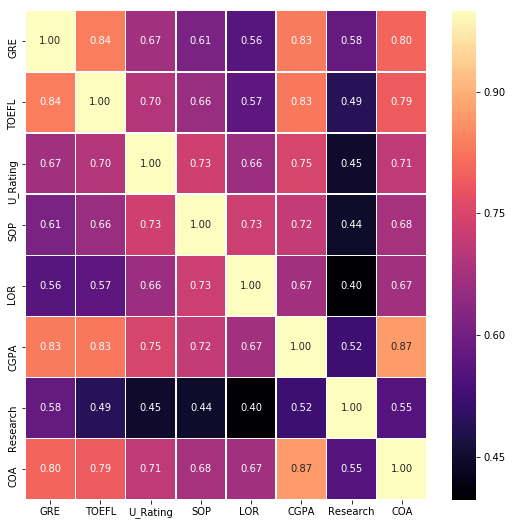

In [13]:
fig,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.5, fmt= '.2f',cmap="magma")
plt.show()

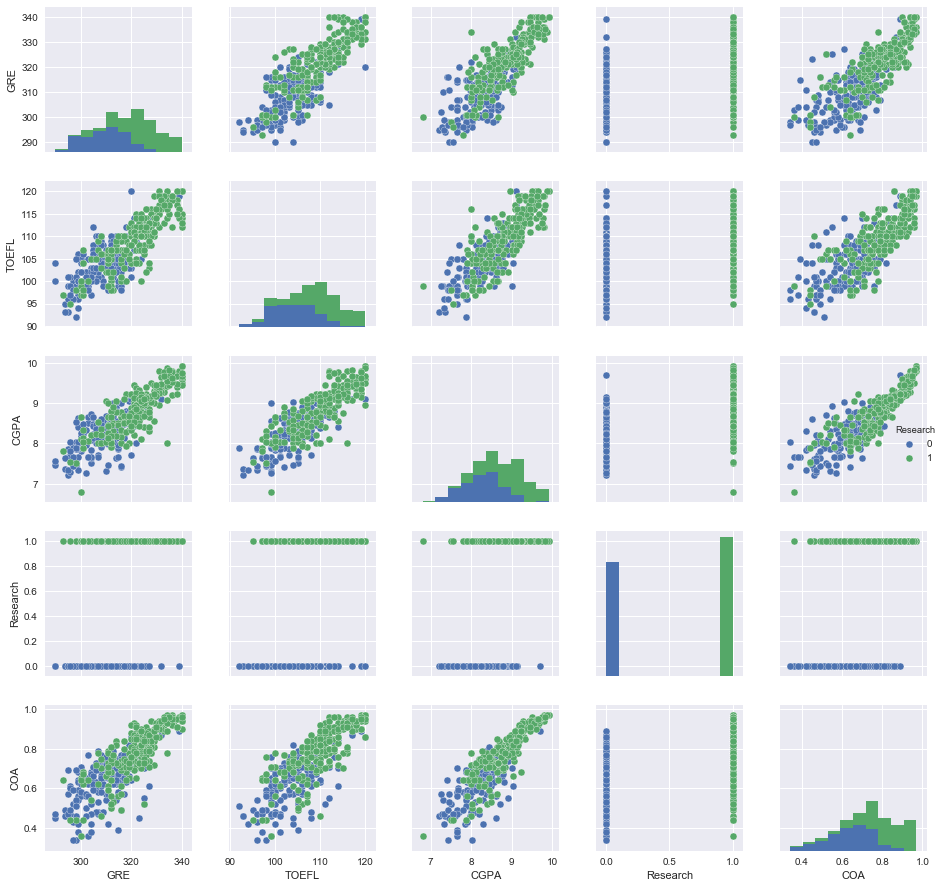

In [14]:
sns.set(style="darkgrid",context="notebook")
cols = ["GRE","TOEFL","CGPA","Research","COA"]
sns.pairplot(data[cols],hue='Research',kind = "scatter")
plt.tight_layout()
plt.show()

## Tofel Score Distribution

In [15]:
data.TOEFL.describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL, dtype: float64

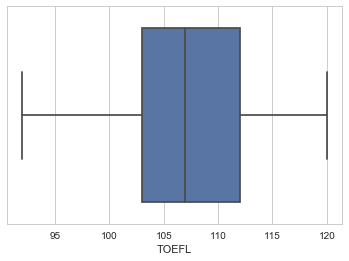

In [16]:
sns.set(style="whitegrid")
sns.boxplot(x=data["TOEFL"])

## GRE Score Distribution

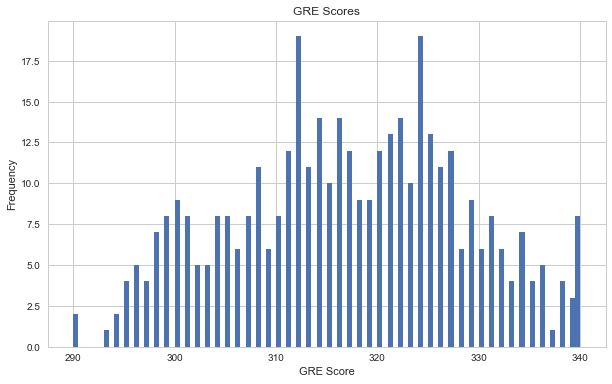

In [17]:
data["GRE"].plot(kind = 'hist',bins = 100,figsize = (10,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

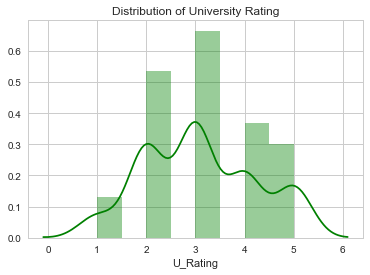

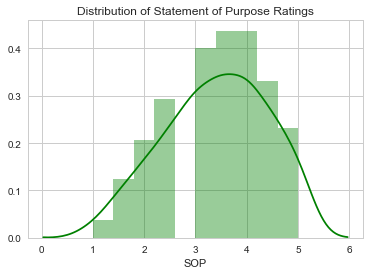

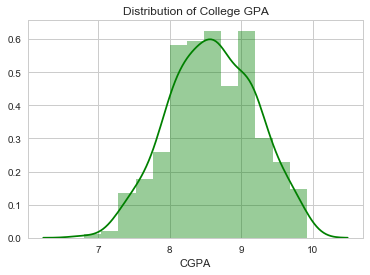

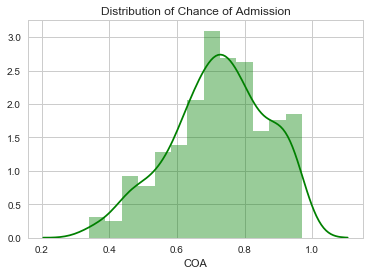

In [18]:
fig = sns.distplot(data['U_Rating'],color='Green')
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(data['SOP'],color='Green')
plt.title("Distribution of Statement of Purpose Ratings")
plt.show()

fig = sns.distplot(data['CGPA'],color='Green')
plt.title("Distribution of College GPA")
plt.show()

fig = sns.distplot(data['COA'],color='Green')
plt.title("Distribution of Chance of Admission")
plt.show()

# Divide data set

In [52]:
y = data.COA
x = data.drop(["COA"],axis=1)
x_train, x_test,y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 1)

# Regression Methods

## Linear Regression Model

In [53]:
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)
print("slope ",lm.coef_)
print("intercept ",lm.intercept_)
y_pred_l = lm.predict(x_test)
y_pred_train = lm.predict(x_train)
print("r_square score: ", r2_score(y_test,y_pred_l))
print("r_square score on training set: ", r2_score(y_train,y_pred_train))

slope  [ 0.00141909  0.00267904  0.00891003 -0.00013112  0.021021    0.10788875
  0.03021795]
intercept  -1.0546546856271561
r_square score:  0.8103743116598131
r_square score on training set:  0.7957139978586952


## Decision Tree Regression

In [54]:
dtm = tree.DecisionTreeRegressor(max_depth=20)
dtm.fit(x_train,y_train)
y_pred = dtm.predict(x_test)
y_pred_train = dtm.predict(x_train)
print("r_square score: ", r2_score(y_test,y_pred))
print("r_square score on training set: ", r2_score(y_train,y_pred_train))

r_square score:  0.6531752859091657
r_square score on training set:  1.0


In [55]:
dtm = tree.DecisionTreeRegressor(max_depth=5)
dtm.fit(x_train,y_train)
y_pred_d = dtm.predict(x_test)
y_pred_train = dtm.predict(x_train)
print("r_square score: ", r2_score(y_test,y_pred_d))
print("r_square score on training set: ", r2_score(y_train,y_pred_train))

r_square score:  0.6837828721097778
r_square score on training set:  0.8621363043667035


## Random Forest Regression

In [56]:
rfm = ensemble.RandomForestRegressor(n_estimators = 100, max_depth= 5)
rfm.fit(x_train,y_train)
y_pred_r = rfm.predict(x_test)
y_pred_train = dtm.predict(x_train)
print("r_square score: ", r2_score(y_test,y_pred_r))
print("r_square score on training set: ", r2_score(y_train,y_pred_train))

r_square score:  0.789646131165976
r_square score on training set:  0.8621363043667035


## Regreesion Model Comparision

Text(0,0.5,'r_square_score')

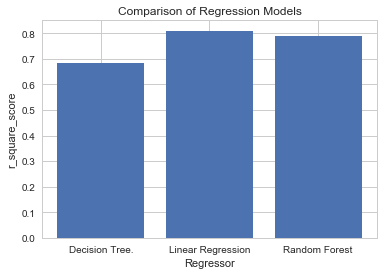

In [57]:
Y = np.array([r2_score(y_test,y_pred_l),r2_score(y_test,y_pred_d),r2_score(y_test,y_pred_r)])
X = ["Linear Regression","Decision Tree.","Random Forest"]
plt.bar(X,Y)
plt.title("Comparison of Regression Models")
plt.xlabel("Regressor")
plt.ylabel("r_square_score")

# Classification Methods

If a candidate have a chance of admit larger than 0.8, we assign label 1 to him. Otherwise, he will recieve a label 0.

In [58]:
y_train_c = [1 if coa > 0.8 else 0 for coa in y_train]
y_test_c = [1 if coa > 0.8 else 0 for coa in y_test]

Score is the mean of accuarcy

$Precision = \frac{TP}{TP+FP}$, the ability to discriminate false samples

$Recall = \frac{TP}{TP+FN}$, the ability to recognize the true samples

$Accuracy= \frac{TP+TN}{TP+TN+FP+FN}$, overall average performance

$F_1 = \frac{2*Precision*Recall}{Precision+Recall}$

$Precision = \frac{TP}{TP+FP}$

$Recall = \frac{TP}{TP+FN}$

$Accuracy= \frac{TP+TN}{TP+TN+FP+FN}$


## Logistic Regression

accuracy score:  0.8833333333333333
precision:  0.8666666666666667
recall:  0.7222222222222222


Text(34,0.5,'true values')

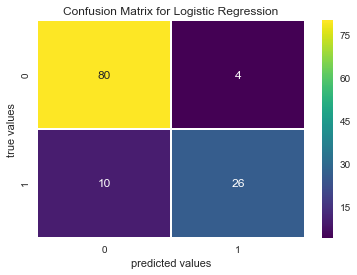

In [59]:
lg = linear_model.LogisticRegression()
lg.fit(x_train,y_train_c)
y_pred_lg = lg.predict(x_test)
print("accuracy score: ", lg.score(x_test,y_test_c))
print("precision: ", metrics.precision_score(y_test_c,y_pred_lg))
print("recall: ", metrics.recall_score(y_test_c,y_pred_lg))
cm_lg = metrics.confusion_matrix(y_test_c,y_pred_lg)
sns.heatmap(cm_lg,annot = True,linewidths=1,cmap="viridis")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("predicted values")
plt.ylabel("true values")

## Support Vector Machine

accuracy score:  0.9083333333333333
precision:  0.8787878787878788
recall:  0.8055555555555556


Text(34,0.5,'true values')

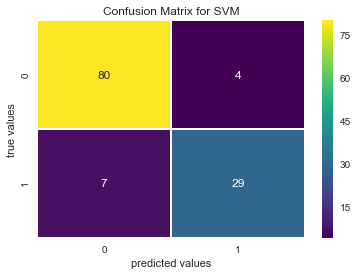

In [60]:
Svm = svm.SVC(kernel='linear')
Svm.fit(x_train,y_train_c)
y_pred_svm = Svm.predict(x_test)
print("accuracy score: ", Svm.score(x_test,y_test_c))
print("precision: ", metrics.precision_score(y_test_c,y_pred_svm))
print("recall: ", metrics.recall_score(y_test_c,y_pred_svm))
cm_svm = metrics.confusion_matrix(y_test_c,y_pred_svm)
sns.heatmap(cm_svm,annot = True,linewidths=1,cmap="viridis")
plt.title("Confusion Matrix for SVM")
plt.xlabel("predicted values")
plt.ylabel("true values")

## Naive Bayes

accuracy score:  0.9166666666666666
precision:  0.7954545454545454
recall:  0.9722222222222222


Text(34,0.5,'true values')

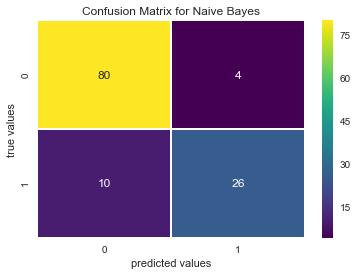

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train_c)
y_pred_nb = nb.predict(x_test)
print("accuracy score: ", nb.score(x_test,y_test_c))
print("precision: ", metrics.precision_score(y_test_c,y_pred_nb))
print("recall: ", metrics.recall_score(y_test_c,y_pred_nb))
cm_nb = metrics.confusion_matrix(y_test_c,y_pred_nb)
sns.heatmap(cm_lg,annot = True,linewidths=1,cmap="viridis")
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("predicted values")
plt.ylabel("true values")

## Decision Tree Classification

accuracy score:  0.9083333333333333
precision:  0.9032258064516129
recall:  0.7777777777777778


Text(34,0.5,'true values')

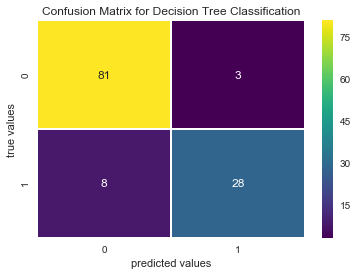

In [62]:
dtc = tree.DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train,y_train_c)
y_pred_dtc = dtc.predict(x_test)
print("accuracy score: ", dtc.score(x_test,y_test_c))
print("precision: ", metrics.precision_score(y_test_c,y_pred_dtc))
print("recall: ", metrics.recall_score(y_test_c,y_pred_dtc))
cm_dtc = metrics.confusion_matrix(y_test_c,y_pred_dtc)
sns.heatmap(cm_dtc,annot = True,linewidths=1,cmap="viridis")
plt.title("Confusion Matrix for Decision Tree Classification")
plt.xlabel("predicted values")
plt.ylabel("true values")

## Random Forest Classification

accuracy score:  0.9333333333333333
precision:  0.9375
recall:  0.8333333333333334


Text(34,0.5,'true values')

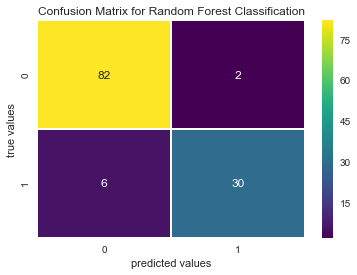

In [63]:
rfc = ensemble.RandomForestClassifier(n_estimators = 100, max_depth= 5)
rfc.fit(x_train,y_train_c)
y_pred_rfc = rfc.predict(x_test)
print("accuracy score: ", rfc.score(x_test,y_test_c))
print("precision: ", metrics.precision_score(y_test_c,y_pred_rfc))
print("recall: ", metrics.recall_score(y_test_c,y_pred_rfc))
cm_rfc = metrics.confusion_matrix(y_test_c,y_pred_rfc)
sns.heatmap(cm_rfc,annot = True,linewidths=1,cmap="viridis")
plt.title("Confusion Matrix for Random Forest Classification")
plt.xlabel("predicted values")
plt.ylabel("true values")

## K-Nearest Neighbors 

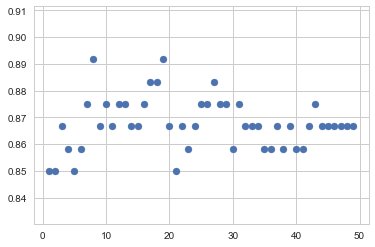

In [64]:
# find k value
scores = []
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train_c)
    scores.append(knn.score(x_test,y_test_c))
plt.scatter(range(1,50),scores)

accuracy score:  0.8916666666666667
precision:  0.896551724137931
recall:  0.7222222222222222


Text(34,0.5,'true values')

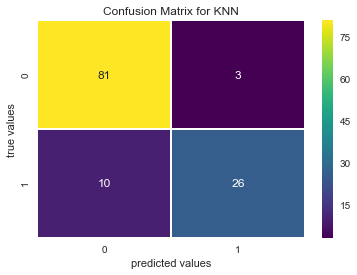

In [67]:
knn5 = neighbors.KNeighborsClassifier(n_neighbors=8)
knn5.fit(x_train,y_train_c)
y_pred_knn5 = knn5.predict(x_test)
print("accuracy score: ", knn5.score(x_test,y_test_c))
print("precision: ", metrics.precision_score(y_test_c,y_pred_knn5))
print("recall: ", metrics.recall_score(y_test_c,y_pred_knn5))
cm_knn5 = metrics.confusion_matrix(y_test_c,y_pred_knn5)
sns.heatmap(cm_knn5,annot = True,linewidths=1,cmap="viridis")
plt.title("Confusion Matrix for KNN")
plt.xlabel("predicted values")
plt.ylabel("true values")

## Classification Methods Comparison 

Text(0,0.5,'Score')

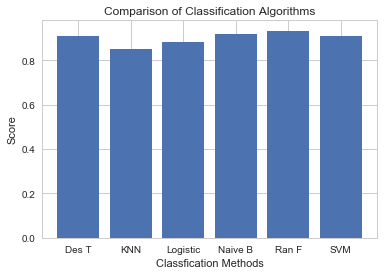

In [66]:
Y = np.array([lg.score(x_test,y_test_c),Svm.score(x_test,y_test_c),\
              nb.score(x_test,y_test_c),dtc.score(x_test,y_test_c),\
              rfc.score(x_test,y_test_c),knn5.score(x_test,y_test_c)])
X = ["Logistic","SVM","Naive B","Des T","Ran F","KNN"]

plt.bar(X,Y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Classfication Methods")
plt.ylabel("Score")